In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":16})

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
import pycbc.pnutils
import lalsimulation as lalsim

In [5]:
import sample
import waveform
import dataset
import model_utils

In [6]:
# mass_ratios, spin1xs, spin1ys, spin1zs, spin2xs, spin2ys, spin2zs, coa_phases, inclinations = sample.draw_mass_ratio_samples(10, 1, 3)
mass_ratios, spin1xs, spin1ys, spin1zs, spin2xs, spin2ys, spin2zs, coa_phases, inclinations = sample.draw_inc_coa_phase_samples(npts=10, mass_ratio=4, spin1_mag=0, spin1_phi=0, spin1_theta=0, spin2_mag=0, spin2_phi=0, spin2_theta=0)

In [7]:
# uniform spacing throughout
t1 = -2000
# t1 = -500
# t1 = -200
# t1 = -50
t2 = 70
dt = 0.25
new_times_M = np.arange(t1, t2, dt)

In [8]:
hp, hc = waveform.generate_waveform(new_times_M)

In [9]:
plt.plot(new_times_M, hp)

In [10]:
t_idxs = np.arange(len(new_times_M))
# t_training_idxs = None
t_training_idxs = t_idxs[::2]
t_validation_idxs = t_idxs[1::2]

In [11]:
times, thetas, hps = waveform.generate_waveforms(
    new_times_M,
    mass_ratios,
    spin1xs,
    spin1ys,
    spin1zs,
    spin2xs,
    spin2ys,
    spin2zs,
    coa_phases,
    inclinations,
    time_idxs=t_training_idxs,
    approximant="IMRPhenomXHM"
)

In [12]:
times.shape

(4140, 1)

In [13]:
thetas.shape

(10, 9)

(-100.0, 100.0)

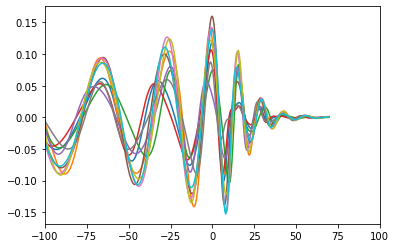

In [14]:
for hp in hps:
    plt.plot(times, hp)
plt.xlim(-100, 100)

In [15]:
def generate_parameters():
    """
    returns arrays of parameters that can be passed into `generate_waveform_data`
    """
    pass

In [16]:
def generate_waveform_data(params):
    pass

In [17]:
def save_waveform_data():
    pass

In [18]:
def load_waveform_data():
    pass

# train and val

In [19]:
# uniform spacing throughout
t1 = -2000
# t1 = -500
# t1 = -200
# t1 = -50
t2 = 70
dt = 0.5
new_times_M = np.arange(t1, t2, dt)

In [20]:
t_idxs = np.arange(len(new_times_M))
t_training_idxs = None
t_validation_idxs = None
# t_training_idxs = t_idxs[::2]
# t_validation_idxs = t_idxs[1::2]


In [21]:
n_train_samples = 10000
# n_train_samples = 10
n_val_samples = 100
# n_val_samples = 10

In [22]:
mass_ratio_low = 1
mass_ratio_high = 2

In [23]:


# train_mass_ratios, train_spin1xs, train_spin1ys, train_spin1zs, train_spin2xs, train_spin2ys, train_spin2zs, train_coa_phases, train_inclinations = sample.draw_mass_ratio_samples(
#     n_train_samples, mass_ratio_low, mass_ratio_high)

# train_mass_ratios, train_spin1xs, train_spin1ys, train_spin1zs, train_spin2xs, train_spin2ys, train_spin2zs, train_coa_phases, train_inclinations = sample.draw_inc_coa_phase_samples(npts=n_train_samples, mass_ratio=4)


train_mass_ratios, train_spin1xs, train_spin1ys, train_spin1zs, train_spin2xs, train_spin2ys, train_spin2zs, train_coa_phases, train_inclinations = sample.draw_mass_ratio_inc_coa_phase_samples(n_train_samples, mass_ratio_low, mass_ratio_high)



In [24]:



# val_mass_ratios, val_spin1xs, val_spin1ys, val_spin1zs, val_spin2xs, val_spin2ys, val_spin2zs, val_coa_phases, val_inclinations = sample.draw_mass_ratio_samples(
#     n_val_samples, mass_ratio_low, mass_ratio_high)




val_mass_ratios, val_spin1xs, val_spin1ys, val_spin1zs, val_spin2xs, val_spin2ys, val_spin2zs, val_coa_phases, val_inclinations = sample.draw_mass_ratio_inc_coa_phase_samples(n_val_samples, mass_ratio_low, mass_ratio_high)



In [25]:
%%time
train_times, train_thetas, train_hps = waveform.generate_waveforms(
    new_times_M,
    train_mass_ratios,
    train_spin1xs,
    train_spin1ys,
    train_spin1zs,
    train_spin2xs,
    train_spin2ys,
    train_spin2zs,
    train_coa_phases,
    train_inclinations,
    time_idxs=t_training_idxs,
    approximant="IMRPhenomXHM",
)

CPU times: user 11min 34s, sys: 35.9 s, total: 12min 10s
Wall time: 12min 10s


In [26]:
%%time
val_times, val_thetas, val_hps = waveform.generate_waveforms(
    new_times_M,
    val_mass_ratios,
    val_spin1xs,
    val_spin1ys,
    val_spin1zs,
    val_spin2xs,
    val_spin2ys,
    val_spin2zs,
    val_coa_phases,
    val_inclinations,
    time_idxs=t_validation_idxs,
    approximant="IMRPhenomXHM",
)

CPU times: user 7 s, sys: 1.24 s, total: 8.25 s
Wall time: 8.25 s


In [27]:
batch_size = 1024

In [28]:
train_ds = dataset.DataGen(thetas=train_thetas, times=train_times, ys=train_hps, batch_size=batch_size, shuffle=True)

In [29]:
val_ds = dataset.DataGen(thetas=val_thetas, times=val_times, ys=val_hps, batch_size=batch_size, shuffle=False)

In [30]:
train_ds.__len__()

40430

In [31]:
f_rd_mf = waveform.HztoMf(pycbc.pnutils._get_final_freq(approx=lalsim.SEOBNRv4, m1=75, m2=25, s1z=0.99, s2z=0.99), 100)
f_rd_mf

0.1367675815410475

In [32]:
time_b_scale = f_rd_mf

In [33]:
theta_b_scale = 1

In [34]:
epochs = 10

In [35]:
%%time
history, model = model_utils.run_model_ds(
    train_ds=train_ds,
    time_b_scale=time_b_scale,
    theta_b_scale=theta_b_scale,
    theta_input_shape=train_thetas.shape[1],
    epochs=epochs,
    threshold=1e-7,
    validation_data=val_ds,
    verbose=1,
    batch_size=batch_size,
)


40429
Metal device set to: Apple M1 Pro
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 theta_input (InputLayer)       [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          256         ['time_input[0][0]']             
                                                                                                  
 dense_1 (Dense)                (None, 128)          1280        ['theta_input[0][0]']            
                                                      

2022-07-03 18:47:29.979586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-03 18:47:29.979694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-07-03 18:47:30.232929: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


    1/40430 [..............................] - ETA: 3:58:53 - loss: 0.0604

2022-07-03 18:47:30.447590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40427/40430 [============================>.] - ETA: 0s - loss: 1.7209e-04

2022-07-03 18:53:26.142590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40430/40430 [==============================] - 358s 9ms/step - loss: 1.7208e-04 - val_loss: 5.8719e-06
Epoch 2/10
40430/40430 [==============================] - 356s 9ms/step - loss: 3.9974e-06 - val_loss: 4.8424e-06
Epoch 3/10
40430/40430 [==============================] - 360s 9ms/step - loss: 2.5388e-06 - val_loss: 2.7236e-06
Epoch 4/10
40430/40430 [==============================] - 365s 9ms/step - loss: 1.9362e-06 - val_loss: 4.1291e-06
Epoch 5/10
40430/40430 [==============================] - 364s 9ms/step - loss: 1.7795e-06 - val_loss: 3.0491e-06
Epoch 6/10
40430/40430 [==============================] - 360s 9ms/step - loss: 1.5072e-06 - val_loss: 2.7145e-06
Epoch 7/10
40430/40430 [==============================] - 366s 9ms/step - loss: 1.3244e-06 - val_loss: 3.0032e-06
Epoch 8/10
40430/40430 [==============================] - 365s 9ms/step - loss: 1.0746e-06 - val_loss: 1.6874e-06
Epoch 9/10
40430/40430 [==============================] - 357s 9ms/step - loss: 1.4862e-06 - val_lo

In [36]:
# new_model = tf.keras.models.load_model("saved_model.h5")

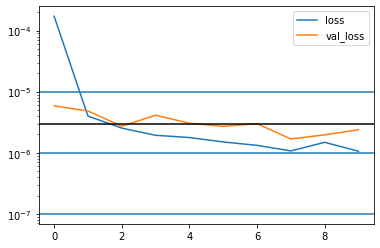

In [37]:
plt.figure()
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.axhline(1e-5)
plt.axhline(1e-6)
plt.axhline(3e-6, c='k')
plt.axhline(1e-7)
plt.yscale("log")


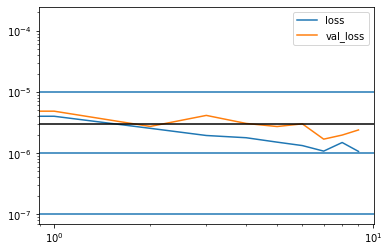

In [38]:
plt.figure()
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.axhline(1e-5)
plt.axhline(1e-6)
plt.axhline(3e-6, c='k')
plt.axhline(1e-7)

In [39]:
try:
    plt.figure()
    plt.plot(history.history["lr"], label='lr')
    plt.legend()
    plt.yscale("log")
    # plt.xscale("log")
except:
    pass

<Figure size 432x288 with 0 Axes>

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 theta_input (InputLayer)       [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          256         ['time_input[0][0]']             
                                                                                                  
 dense_1 (Dense)                (None, 128)          1280        ['theta_input[0][0]']            
                                                                                              

In [41]:
# for num, (data, labels) in enumerate(ds):
#     # print(f"num: {num}")
#     print(data.shape, labels.shape)
#     print(data, labels)

In [42]:
def build_input_single_q(t, *args):
    """
    t is a matrix i.e. shape = (-1, 1)
    list of parameters
    """
    theta = np.array([*args])
    theta = np.ones_like(t) * theta

    return np.column_stack((t, theta))

In [43]:
build_input_single_q(np.arange(0, 1, 0.1)[:,np.newaxis], [1,2,3])

array([[0. , 1. , 2. , 3. ],
       [0.1, 1. , 2. , 3. ],
       [0.2, 1. , 2. , 3. ],
       [0.3, 1. , 2. , 3. ],
       [0.4, 1. , 2. , 3. ],
       [0.5, 1. , 2. , 3. ],
       [0.6, 1. , 2. , 3. ],
       [0.7, 1. , 2. , 3. ],
       [0.8, 1. , 2. , 3. ],
       [0.9, 1. , 2. , 3. ]])

In [44]:
def build_input_multiple_q(t, thetas):
    """
    t is a vector
    thetas is a vector
    """
    return np.row_stack([build_input_single_q(t, *theta) for theta in thetas])

In [45]:
train_thetas.shape

(10000, 9)

In [46]:
train_times.shape

(4140, 1)

In [47]:
val_times

array([[-2000. ],
       [-1999.5],
       [-1999. ],
       ...,
       [   68.5],
       [   69. ],
       [   69.5]])

In [48]:
train_times

array([[-2000. ],
       [-1999.5],
       [-1999. ],
       ...,
       [   68.5],
       [   69. ],
       [   69.5]])

In [49]:
# X_input = build_input_multiple_q(train_times, [train_thetas[0]])
# X_input = build_input_multiple_q(train_times, train_thetas)
X_input = build_input_multiple_q(val_times, val_thetas)

In [50]:
X_input.shape

(414000, 10)

In [53]:
n_waveforms = val_thetas.shape[0]
n_times = val_times.shape[0]

In [54]:
# yhat = model([X_input[:,0], X_input[:,1:]]).numpy().reshape(1, -1)
yhat_val = model([X_input[:,0], X_input[:,1:]]).numpy().reshape(n_waveforms, n_times)

In [55]:
yhat_val.shape

(100, 4140)

In [56]:
plt.plot(train_times, val_hps[0])
plt.plot(val_times, yhat_val[0], ls='--')

(-100.0, 100.0)

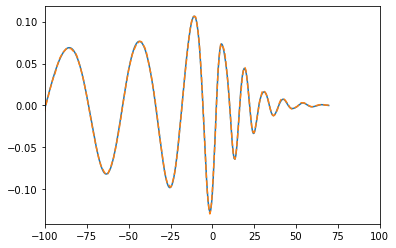

In [57]:
plt.plot(train_times, val_hps[0])
plt.plot(val_times, yhat_val[0], ls='--')
plt.xlim(-100, 100)

In [58]:
mse_val = tf.keras.losses.mean_squared_error(val_hps, yhat_val)

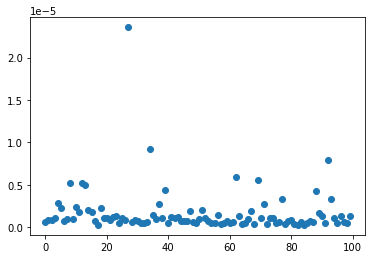

In [59]:
plt.plot(mse_val, 'o')

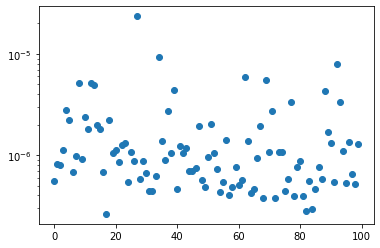

In [60]:
plt.plot(mse_val, 'o')
plt.yscale('log')

In [61]:
mse_val.shape

TensorShape([100])

In [62]:
print(mse_val.numpy().min())
print(mse_val.numpy().max())
print(mse_val.numpy().mean())
print(np.median(mse_val.numpy()))

2.6208474e-07
2.3587903e-05
1.6873937e-06
9.0408196e-07


In [63]:
plt.plot(val_thetas[:,0], mse_val, 'o')
plt.plot(train_thetas[:,0], np.ones_like(train_thetas[:,0]) * mse_val.numpy().mean(), 'o')
plt.yscale('log')

Text(0.5, 0, 'coa_phase')

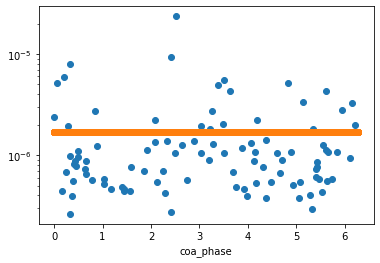

In [64]:
plt.plot(val_thetas[:,7], mse_val, 'o')
plt.plot(train_thetas[:,7], np.ones_like(train_thetas[:,0]) * mse_val.numpy().mean(), 'o')
plt.yscale('log')
plt.xlabel("coa_phase")

In [65]:
plt.plot(val_thetas[:,8], mse_val, 'o')
plt.plot(train_thetas[:,8], np.ones_like(train_thetas[:,0]) * mse_val.numpy().mean(), 'o')
plt.yscale('log')
plt.xlabel("inclination")

Text(0.5, 0, 'inclination')

Text(0.5, 0, 'inclination')

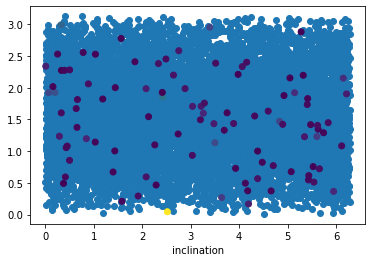

In [66]:
plt.scatter(train_thetas[:,7], train_thetas[:,8])
plt.scatter(val_thetas[:,7], val_thetas[:,8], c=mse_val)
plt.xlabel("coa_phase")
plt.xlabel("inclination")

In [67]:
plt.scatter(val_thetas[:,7], val_thetas[:,8], c=mse_val)


In [68]:
worst_idx = np.argmax(mse_val)
worst_idx

27

In [72]:
val_thetas[worst_idx]

array([1.13603105, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.51679558, 0.0451735 ])

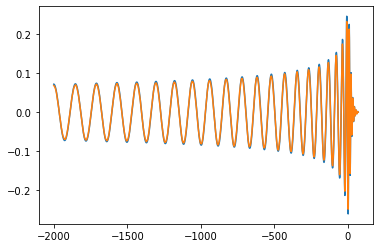

In [73]:
plt.figure()
plt.plot(val_times, val_hps[worst_idx])
plt.plot(val_times, yhat_val[worst_idx])
# plt.xlim(-100, 120)

(-500.0, 120.0)

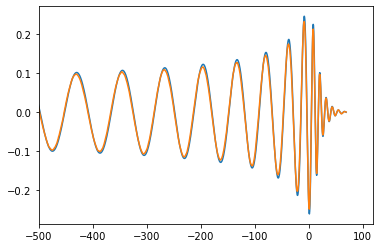

In [74]:
plt.figure()
plt.plot(val_times, val_hps[worst_idx])
plt.plot(val_times, yhat_val[worst_idx])
plt.xlim(-500, 120)

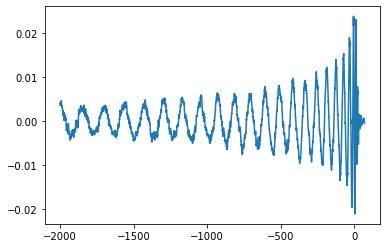

In [75]:
plt.figure()
plt.plot(val_times, val_hps[worst_idx]-yhat_val[worst_idx])
# plt.xlim(-100, 120)

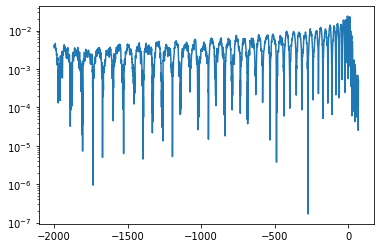

In [76]:
plt.figure()
plt.plot(val_times, np.abs(val_hps[worst_idx]-yhat_val[worst_idx]))
# plt.xlim(-100, 120)
plt.yscale('log')

## add worst cases to training set and make new validation set

In [77]:
# add all validation cases that are worst than the mean validation mse

mse_val.numpy().mean()

1.6873937e-06

In [78]:
val_thetas.shape

(100, 9)

In [79]:
mask = mse_val>mse_val.numpy().mean()

In [80]:
worst_thetas_to_add = val_thetas[mask]

In [81]:
worst_thetas_to_add.shape

(24, 9)

In [82]:
worst_hps_to_add = val_hps[mask]

In [83]:
worst_hps_to_add.shape

(24, 4140)

In [84]:
# val and train are on different time grids... so have to generate the worst ones
# so they are on the train time grid
# or just make it so that train and val time grids are the same

In [85]:



# val_mass_ratios_2, val_spin1xs_2, val_spin1ys_2, val_spin1zs_2, val_spin2xs_2, val_spin2ys_2, val_spin2zs_2, val_coa_phases_2, val_inclinations_2 = sample.draw_mass_ratio_samples(
#     n_val_samples, mass_ratio_low, mass_ratio_high)



# val_mass_ratios_2, val_spin1xs_2, val_spin1ys_2, val_spin1zs_2, val_spin2xs_2, val_spin2ys_2, val_spin2zs_2, val_coa_phases_2, val_inclinations_2 = sample.draw_inc_coa_phase_samples(npts=n_val_samples, mass_ratio=4)

val_mass_ratios_2, val_spin1xs_2, val_spin1ys_2, val_spin1zs_2, val_spin2xs_2, val_spin2ys_2, val_spin2zs_2, val_coa_phases_2, val_inclinations_2 = sample.draw_mass_ratio_inc_coa_phase_samples(n_val_samples, mass_ratio_low, mass_ratio_high)






In [86]:
%%time
val_times_2, val_thetas_2, val_hps_2 = waveform.generate_waveforms(
    new_times_M,
    val_mass_ratios_2,
    val_spin1xs_2,
    val_spin1ys_2,
    val_spin1zs_2,
    val_spin2xs_2,
    val_spin2ys_2,
    val_spin2zs_2,
    val_coa_phases_2,
    val_inclinations_2,
    time_idxs=t_validation_idxs,
    approximant="IMRPhenomXHM",
)

CPU times: user 7.11 s, sys: 1.02 s, total: 8.13 s
Wall time: 8.13 s


In [87]:
train_thetas.shape

(10000, 9)

In [88]:
train_thetas_2 = np.row_stack((train_thetas, worst_thetas_to_add))

In [89]:
train_thetas_2.shape

(10024, 9)

In [90]:
train_hps.shape

(10000, 4140)

In [91]:
train_hps_2 = np.row_stack((train_hps, worst_hps_to_add))

In [92]:
train_hps_2.shape

(10024, 4140)

In [93]:
batch_size = 1024

In [94]:
train_ds_2 = dataset.DataGen(thetas=train_thetas_2, times=train_times, ys=train_hps_2, batch_size=batch_size, shuffle=True)

In [95]:
val_ds_2 = dataset.DataGen(thetas=val_thetas_2, times=val_times_2, ys=val_hps_2, batch_size=batch_size, shuffle=False)

In [96]:
train_ds_2.__len__()

40527

In [97]:
%%time
history, model = model_utils.run_model_ds(
    train_ds=train_ds_2,
    time_b_scale=time_b_scale,
    theta_b_scale=theta_b_scale,
    theta_input_shape=train_thetas.shape[1],
    epochs=epochs,
    threshold=1e-7,
    validation_data=val_ds_2,
    verbose=1,
    batch_size=batch_size,
)


40526
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 theta_input (InputLayer)       [(None, 9)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 128)          256         ['time_input[0][0]']             
                                                                                                  
 dense_7 (Dense)                (None, 128)          1280        ['theta_input[0][0]']            
                                                                                      

2022-07-03 19:57:11.836519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40527/40527 [==============================] - ETA: 0s - loss: 1.6115e-04

2022-07-03 20:03:02.363396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40527/40527 [==============================] - 353s 9ms/step - loss: 1.6115e-04 - val_loss: 4.3339e-06
Epoch 2/10
40527/40527 [==============================] - 347s 9ms/step - loss: 2.9283e-06 - val_loss: 3.9423e-06
Epoch 3/10
40527/40527 [==============================] - 346s 9ms/step - loss: 1.8687e-06 - val_loss: 2.5762e-06
Epoch 4/10
40527/40527 [==============================] - 346s 9ms/step - loss: 1.4551e-06 - val_loss: 2.8293e-06
Epoch 5/10
40527/40527 [==============================] - 346s 9ms/step - loss: 1.3457e-06 - val_loss: 2.9440e-06
Epoch 6/10
40527/40527 [==============================] - 350s 9ms/step - loss: 1.1641e-06 - val_loss: 2.5341e-06
Epoch 7/10
40527/40527 [==============================] - 348s 9ms/step - loss: 1.0489e-06 - val_loss: 2.2466e-06
loading best weights from checkpoint
saving model
CPU times: user 30min 22s, sys: 21min 53s, total: 52min 15s
Wall time: 40min 42s


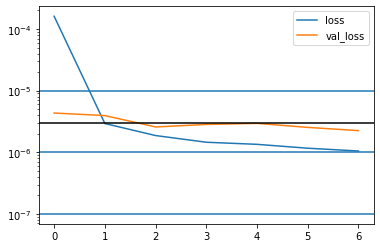

In [98]:
plt.figure()
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.axhline(1e-5)
plt.axhline(1e-6)
plt.axhline(3e-6, c='k')
plt.axhline(1e-7)
plt.yscale("log")


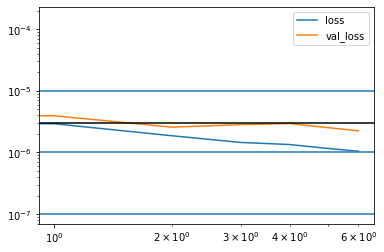

In [99]:
plt.figure()
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.axhline(1e-5)
plt.axhline(1e-6)
plt.axhline(3e-6, c='k')
plt.axhline(1e-7)

In [100]:
# X_input = build_input_multiple_q(train_times, [train_thetas[0]])
# X_input = build_input_multiple_q(train_times, train_thetas)
X_input = build_input_multiple_q(val_times_2, val_thetas_2)

In [101]:
X_input.shape

(414000, 10)

In [102]:
# n_waveforms = train_thetas.shape[0]
# n_times = train_times.shape[0]

n_waveforms = val_thetas_2.shape[0]
n_times = val_times_2.shape[0]

In [103]:
# yhat = model([X_input[:,0], X_input[:,1:]]).numpy().reshape(1, -1)
yhat_val = model([X_input[:,0], X_input[:,1:]]).numpy().reshape(n_waveforms, n_times)

In [104]:
yhat_val.shape

(100, 4140)

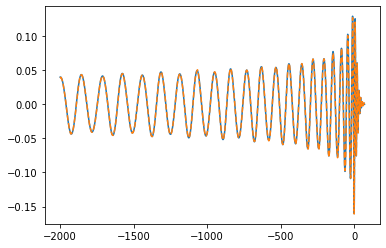

In [105]:
plt.plot(train_times, val_hps_2[0])
plt.plot(val_times_2, yhat_val[0], ls='--')

In [106]:
plt.plot(train_times, val_hps_2[0])
plt.plot(val_times_2, yhat_val[0], ls='--')
plt.xlim(-100, 100)

(-100.0, 100.0)

In [107]:
mse_val = tf.keras.losses.mean_squared_error(val_hps_2, yhat_val)

In [108]:
plt.plot(mse_val, 'o')

In [109]:
plt.plot(mse_val, 'o')
plt.yscale('log')

In [110]:
mse_val.shape

TensorShape([100])

In [111]:
print(mse_val.numpy().min())
print(mse_val.numpy().max())
print(mse_val.numpy().mean())
print(np.median(mse_val.numpy()))

5.609615e-07
3.750104e-05
2.246582e-06
1.4490188e-06


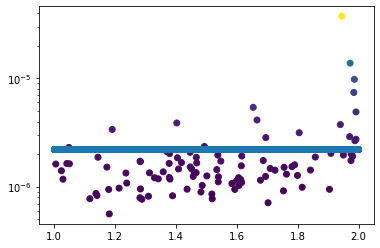

In [127]:
plt.scatter(val_thetas_2[:,0], mse_val, c=mse_val)
plt.plot(train_thetas_2[:,0], np.ones_like(train_thetas_2[:,0]) * mse_val.numpy().mean(), 'o')
plt.yscale('log')

Text(0.5, 0, 'coa_phase')

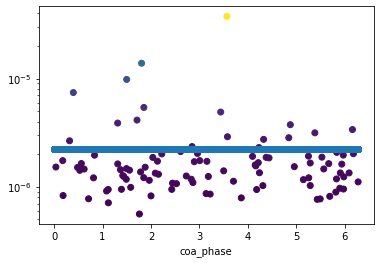

In [126]:
plt.scatter(val_thetas_2[:,7], mse_val, c=mse_val)
plt.plot(train_thetas_2[:,7], np.ones_like(train_thetas_2[:,0]) * mse_val.numpy().mean(), 'o')
plt.yscale('log')
plt.xlabel("coa_phase")

Text(0.5, 0, 'inclination')

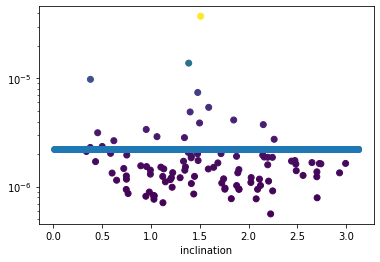

In [125]:
plt.scatter(val_thetas_2[:,8], mse_val, c=mse_val)
plt.plot(train_thetas_2[:,8], np.ones_like(train_thetas_2[:,0]) * mse_val.numpy().mean(), 'o')
plt.yscale('log')
plt.xlabel("inclination")

In [115]:
plt.scatter(train_thetas_2[:,7], train_thetas_2[:,8])
plt.scatter(val_thetas_2[:,7], val_thetas_2[:,8], c=mse_val)
plt.xlabel("coa_phase")
plt.xlabel("inclination")

Text(0.5, 0, 'inclination')

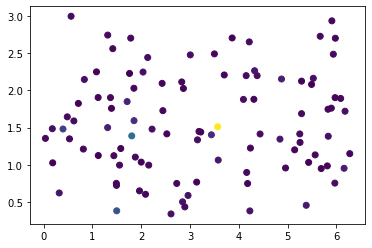

In [116]:
plt.scatter(val_thetas_2[:,7], val_thetas_2[:,8], c=mse_val)
# plt.plot(train_thetas_2[:,8], np.ones_like(train_thetas_2[:,0]) * mse_val.numpy().mean(), 'o')

In [117]:
worst_idx = np.argmax(mse_val)
worst_idx

65

In [118]:
val_thetas_2[worst_idx]

array([1.94518426, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.5676295 , 1.51041592])

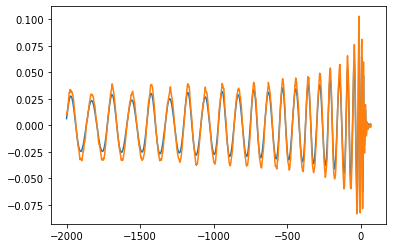

In [119]:
plt.figure()
plt.plot(val_times_2, val_hps_2[worst_idx])
plt.plot(val_times_2, yhat_val[worst_idx])
# plt.xlim(-100, 120)

(-500.0, 120.0)

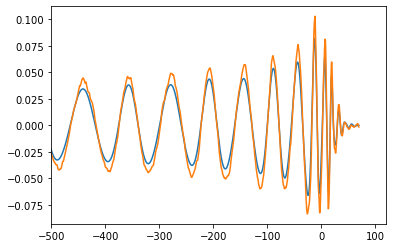

In [120]:
plt.figure()
plt.plot(val_times_2, val_hps_2[worst_idx])
plt.plot(val_times_2, yhat_val[worst_idx])
plt.xlim(-500, 120)

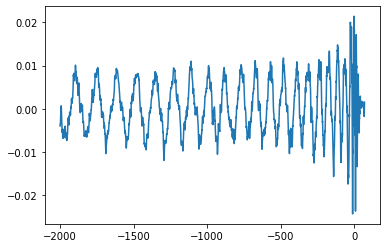

In [121]:
plt.figure()
plt.plot(val_times_2, val_hps_2[worst_idx]-yhat_val[worst_idx])
# plt.xlim(-100, 120)

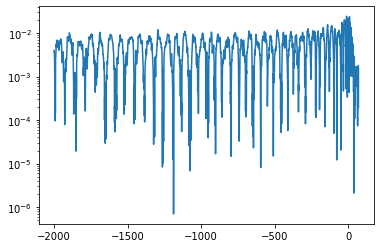

In [122]:
plt.figure()
plt.plot(val_times_2, np.abs(val_hps_2[worst_idx]-yhat_val[worst_idx]))
# plt.xlim(-100, 120)
plt.yscale('log')